In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from ipfn import ipfn

# Import data

In [2]:
# Define dataset
dataset = "commuter"

In [15]:
# Cost matrix
cost_matrix = np.loadtxt('../data/input/{}/cost_matrix.txt'.format(dataset))
# Origin supply
origin_supply = np.loadtxt('../data/input/{}/origin_supply.txt'.format(dataset))
# Destination demand
destination_demand = np.loadtxt('../data/input/{}/destination_demand.txt'.format(dataset))
# Origin-destination matrix for validation
od_matrix = np.loadtxt('../data/input/{}/od_matrix.txt'.format(dataset))

# Borough names
boroughs = np.loadtxt('../data/input/{}/origins.txt'.format(dataset),dtype=str)
# Borough polygons
borough_polygons = gpd.read_file('../data/input/{}/borough_coordinates.json'.format(dataset))
# Inferred flows through Newton Raphson method (C function)
newton_raphson_flows = np.loadtxt('../data/output/{}/{}/newton_raphson_flows.txt'.format(dataset,"newton_raphson"))
# Inferred flows through grid search using the DSF method (C function)
dsf_flows = np.loadtxt('../data/output/{}/{}/dsf_flows.txt'.format(dataset,"dsf"))

# Get dimensions of matrix
N,M = od_matrix.shape

# Run Iterative proportional filtering

In [16]:
# Store marginals and their dimensions
# p is the dimension summer over

tip = np.sum(od_matrix,axis=1)
tpj = np.sum(od_matrix,axis=0)

aggregates = [tip, tpj]
dimensions = [[0], [1]]

In [18]:
# Run algorithm
IPF = ipfn.ipfn(np.ones((N,M)), aggregates, dimensions)
ipf_flows = IPF.iteration()

# Visualise inferred versus actual matrix

In [19]:
# Actual flows: od_matrix -- name: actual_flows
# PySal flows: pysal_flows -- name: pysal_flows
# Newton Raphson (C) algorithm's flows: newton_raphson_flows -- name: newton_raphson_flows
# Grid DSF search (C)malgorithm's flows: dsf_flos --name: dsf_flows

# Choose filename
filename = "iterative_proportional_filtering_flows"
# Get method name from filename
method = filename.split('_flows')[0]

# Decide which data to visualise
if "actual" in filename:
    heatmap_data = od_matrix.astype(int)
elif "pysal" in filename:
    heatmap_data = pysal_flows.astype(int)
elif "newton_raphson" in filename:
    heatmap_data = newton_raphson_flows.astype(int)    
elif "dsf_flows" in filename:
    heatmap_data = dsf_flows.astype(int)        
elif "iterative_proportional_filtering" in filename:
    heatmap_data = ipf_flows.astype(int)

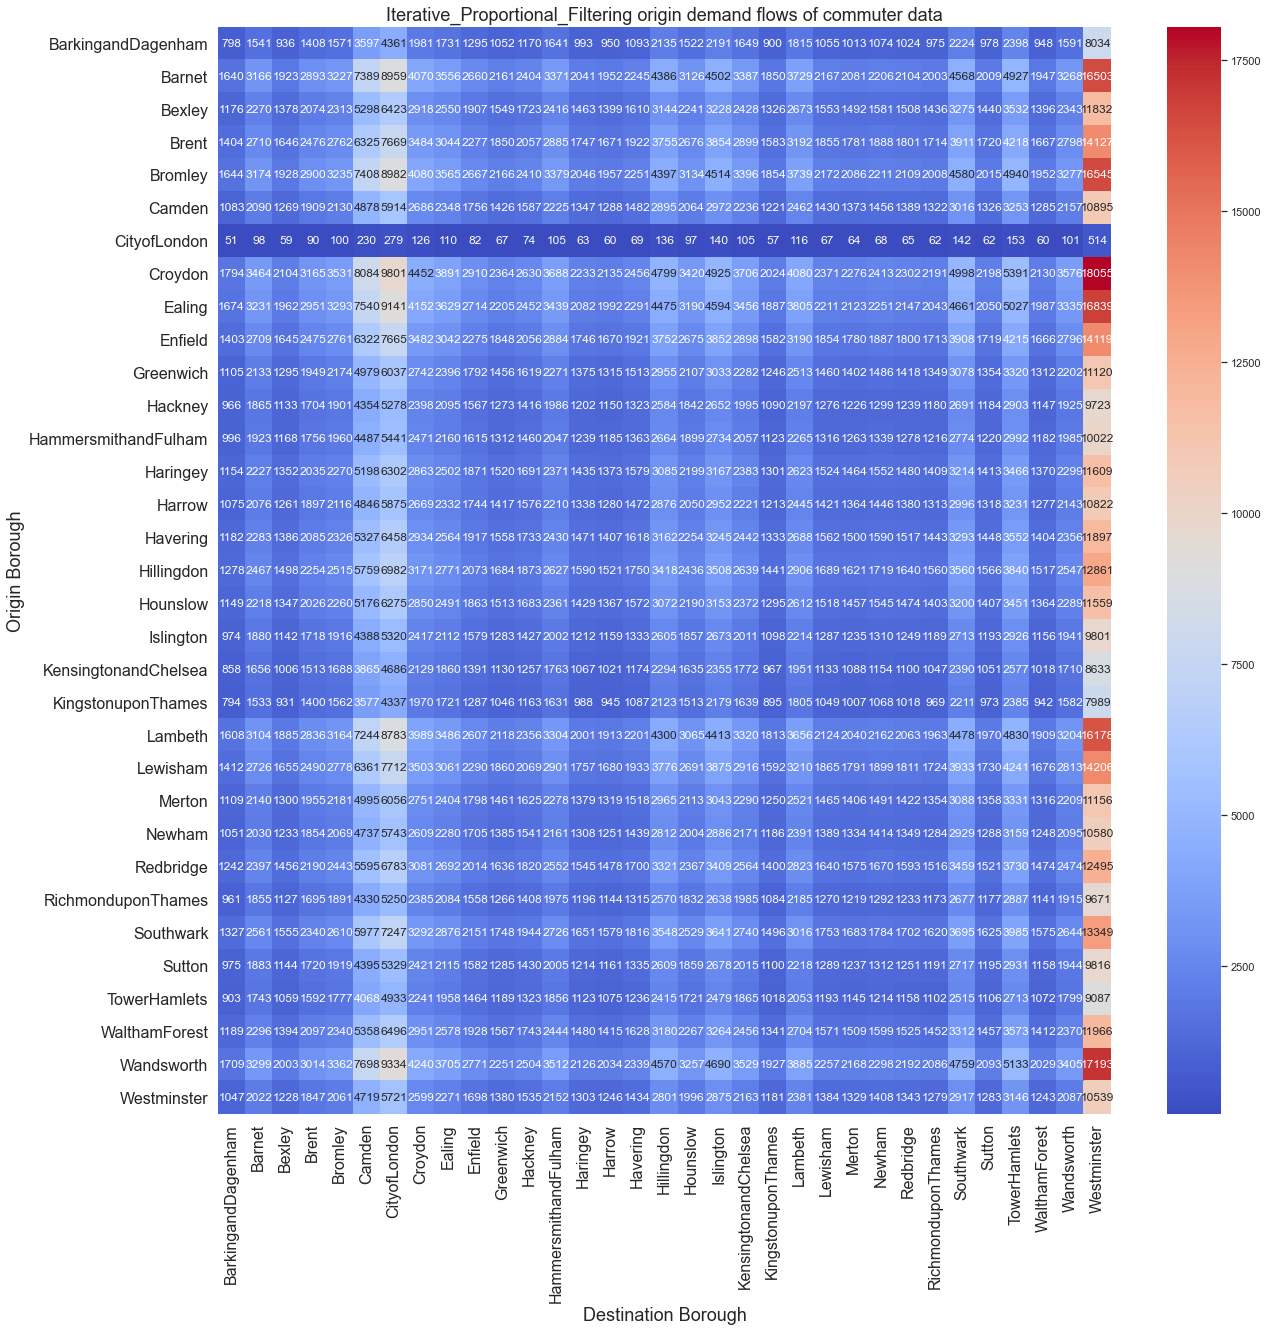

In [20]:
# Change font scaling
sns.set(font_scale=1)
# Set plot size
plt.figure(figsize=(20,20))
# Add heatmap
flow_heatmap = sns.heatmap(heatmap_data,
                            annot=True,
                            cmap="coolwarm",
                            fmt="d",
                            xticklabels=boroughs,
                            yticklabels=boroughs)
# Add x,y axes labels
plt.xlabel("Destination Borough",fontsize=18)
plt.ylabel("Origin Borough",fontsize=18)
# Add title
plt.title('{} origin demand flows of {} data'.format(method.title(),dataset), fontsize=18)
# Increase tick font size
plt.tick_params(labelsize=16)

# Save figure to output
plt.savefig('../data/output/{}/{}/figures/{}.png'.format(dataset,method,filename))
